<a href="https://colab.research.google.com/github/manojmukkamala/VolcanoesOnVenus/blob/master/NeuralNetModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Set Up

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import pickle
import tensorflow as tf

%matplotlib inline

In [0]:
pickle_in = open("/content/drive/My Drive/VolcanoesOnVenus/volcanoes_dataset.pickle", "rb")
volcanoes_dataset = pickle.load(pickle_in)
((X_train, y_train), (X_val, y_val), (X_test, y_test)) = volcanoes_dataset

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

def print_report(y_val, y_val_pred):
    print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))
    print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')

In [0]:
def plot_accuracy(the_model):
    plt.plot(the_model.history['acc'], label = 'Train')
    plt.plot(the_model.history['val_acc'], label = 'Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [0]:
def plot_loss(the_model):
    plt.plot(the_model.history['loss'], label = 'Train')
    plt.plot(the_model.history['val_loss'], label = 'Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### Shallow Neural Net Models

#### Hand Crafted Neural Net

In [0]:
import my_nn_utils as my_net

##### Iteration 1

Cost after epoch 0: 0.715428
Cost after epoch 10: 0.451002
Cost after epoch 20: 0.415507
Cost after epoch 30: 0.414781
Cost after epoch 40: 0.414708
Cost after epoch 50: 0.414650
Cost after epoch 60: 0.414593
Cost after epoch 70: 0.414535
Cost after epoch 80: 0.414477
Cost after epoch 90: 0.414418
Train accuracy: 85.40644969534848 %


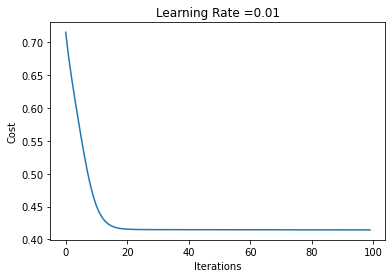

CPU times: user 6min 15s, sys: 14.2 s, total: 6min 29s
Wall time: 3min 17s


In [0]:
%%time

parameters = my_net.L_Layer_Model(X_train, y_train, layers_dims = [X_train.shape[1], 128, 1], activations = ['relu', 'sigmoid'],
                                  num_iterations = 100, learning_rate = 0.01, print_cost = True, print_every = 10)

In [0]:
y_val_pred = my_net.predict(X_val, parameters, ['relu', 'sigmoid'])
print("Validation Accuracy: ", my_net.pred_accuracy(y_val_pred, y_val))

Validation Accuracy:  83.85916780978509


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1834
           1       0.00      0.00      0.00       353

    accuracy                           0.84      2187
   macro avg       0.42      0.50      0.46      2187
weighted avg       0.70      0.84      0.76      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1834    0]
 [ 353    0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### TensorFlow - Keras

##### Iterations 1

- Number of Epochs: 100
- Batch Size: Batch

In [0]:
del(model, vol_model)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
vol_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, batch_size = len(y_train), verbose = 0, shuffle = True)

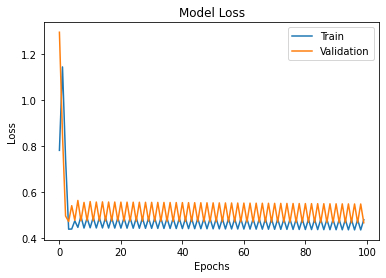

In [0]:
plot_loss(vol_model)

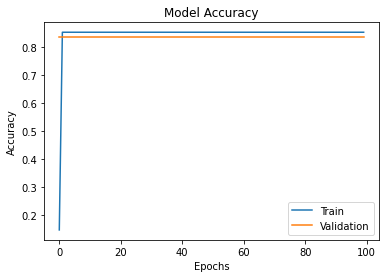

In [0]:
plot_accuracy(vol_model)

In [0]:
y_val_pred = model.predict(X_val)
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0

print("Train Accuracy: ", model.evaluate(X_train, y_train, verbose = 0)[1])
print("Test Accuracy: ", model.evaluate(X_val, y_val, verbose = 0)[1])

Train Accuracy:  0.8540645
Test Accuracy:  0.8385917


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1834
           1       0.00      0.00      0.00       353

    accuracy                           0.84      2187
   macro avg       0.42      0.50      0.46      2187
weighted avg       0.70      0.84      0.76      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1834    0]
 [ 353    0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Deep Neural Net Models

#### Hand Crafted Neural Net

##### Iteration 1

Cost after epoch 0: 0.693120
Cost after epoch 100: 0.593783
Cost after epoch 200: 0.532887
Cost after epoch 300: 0.494575
Cost after epoch 400: 0.469790
Cost after epoch 500: 0.453330
Cost after epoch 600: 0.442144
Cost after epoch 700: 0.434392
Cost after epoch 800: 0.428929
Cost after epoch 900: 0.425029
Train accuracy: 85.40644969534848 %


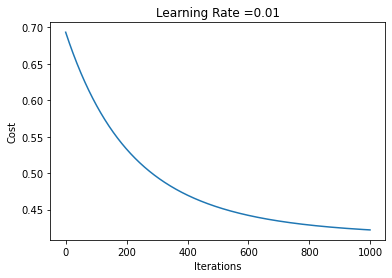

CPU times: user 1h 15min 5s, sys: 2min 38s, total: 1h 17min 43s
Wall time: 39min 6s


In [0]:
%%time

parameters = my_net.L_Layer_Model(X_train, y_train, layers_dims = [X_train.shape[1], 128, 128, 128, 1], activations = ['relu', 'relu', 'relu', 'sigmoid'],
                                  num_iterations = 1000, learning_rate = 0.01, print_cost = True, print_every = 100)

In [0]:
y_val_pred = my_net.predict(X_val, parameters, ['relu', 'relu', 'relu', 'sigmoid'],)
print("Validation Accuracy: ", my_net.pred_accuracy(y_val_pred, y_val))

Validation Accuracy:  83.85916780978509


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1834
           1       0.00      0.00      0.00       353

    accuracy                           0.84      2187
   macro avg       0.42      0.50      0.46      2187
weighted avg       0.70      0.84      0.76      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1834    0]
 [ 353    0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Iteration 2

Cost after epoch 0: 0.693102
Cost after epoch 10: 0.677885
Cost after epoch 20: 0.663110
Cost after epoch 30: 0.647974
Cost after epoch 40: 0.631411
Cost after epoch 50: 0.611582
Cost after epoch 60: 0.585441
Cost after epoch 70: 0.548828
Cost after epoch 80: 0.500769
Cost after epoch 90: 0.453956
Train accuracy: 85.40644969534848 %


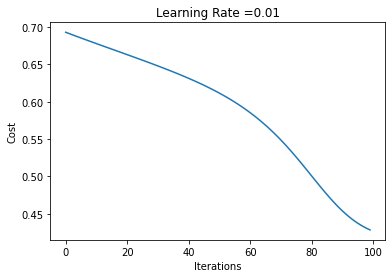

CPU times: user 7min 25s, sys: 14.2 s, total: 7min 39s
Wall time: 3min 51s


In [0]:
%%time

parameters = my_net.L_Layer_Model(X_train, y_train, layers_dims = [X_train.shape[1], 128, 128, 1], activations = ['relu', 'relu', 'sigmoid'],
                                  num_iterations = 100, learning_rate = 0.01, print_cost = True, print_every = 10)

In [0]:
y_val_pred = my_net.predict(X_val, parameters, ['relu', 'relu', 'sigmoid'])
print("Validation Accuracy: ", my_net.pred_accuracy(y_val_pred, y_val))

Validation Accuracy:  83.85916780978509


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1834
           1       0.00      0.00      0.00       353

    accuracy                           0.84      2187
   macro avg       0.42      0.50      0.46      2187
weighted avg       0.70      0.84      0.76      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1834    0]
 [ 353    0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### TensorFlow - Keras

##### Iteration 1

In [0]:
del(model, vol_model)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
vol_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, verbose = 0, shuffle = True)

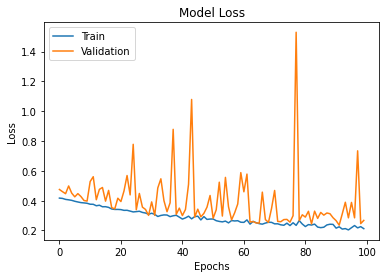

In [0]:
plot_loss(vol_model)

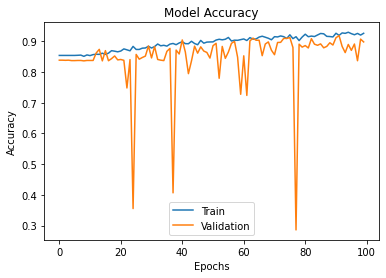

In [0]:
plot_accuracy(vol_model)

In [0]:
y_val_pred = model.predict(X_val)
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0

print("Train Accuracy: ", model.evaluate(X_train, y_train, verbose = 0)[1])
print("Test Accuracy: ", model.evaluate(X_val, y_val, verbose = 0)[1])

Train Accuracy:  0.9319364
Test Accuracy:  0.89803386


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1834
           1       0.85      0.45      0.59       353

    accuracy                           0.90      2187
   macro avg       0.88      0.72      0.76      2187
weighted avg       0.89      0.90      0.88      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1806   28]
 [ 195  158]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


##### Iteration 2

In [0]:
del(model, vol_model)

In [0]:
%%time
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
vol_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, verbose = 0, shuffle = True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
CPU times: user 6min 38s, sys: 9.73 s, total: 6min 48s
Wall time: 6min 30s


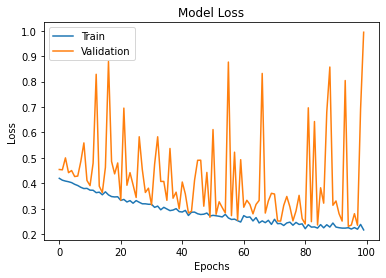

In [0]:
plot_loss(vol_model)

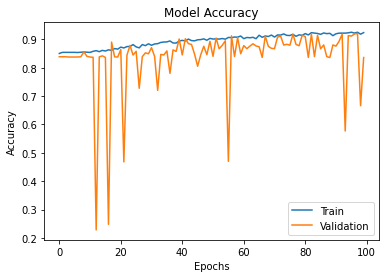

In [0]:
plot_accuracy(vol_model)

In [0]:
y_val_pred = model.predict(X_val)
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0

print("Train Accuracy: ", model.evaluate(X_train, y_train, verbose = 0)[1])
print("Test Accuracy: ", model.evaluate(X_val, y_val, verbose = 0)[1])

Train Accuracy:  0.8542131
Test Accuracy:  0.8358482


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1834
           1       0.00      0.00      0.00       353

    accuracy                           0.84      2187
   macro avg       0.42      0.50      0.46      2187
weighted avg       0.70      0.84      0.76      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1828    6]
 [ 353    0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


##### Iteration 3

In [0]:
del(model, vol_model)

In [0]:
%%time
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
vol_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, verbose = 0, shuffle = True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
CPU times: user 6min 49s, sys: 9.72 s, total: 6min 59s
Wall time: 6min 39s


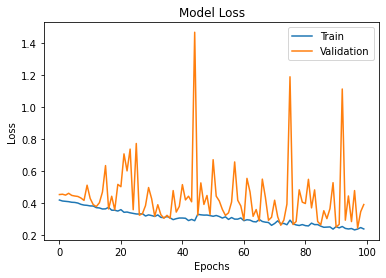

In [0]:
plot_loss(vol_model)

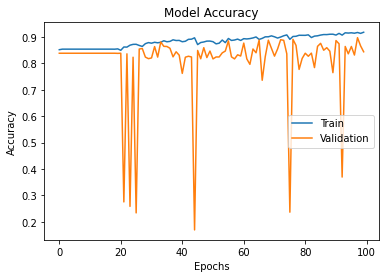

In [0]:
plot_accuracy(vol_model)

In [0]:
y_val_pred = model.predict(X_val)
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0

print("Train Accuracy: ", model.evaluate(X_train, y_train, verbose = 0)[1])
print("Test Accuracy: ", model.evaluate(X_val, y_val, verbose = 0)[1])

Train Accuracy:  0.8947838
Test Accuracy:  0.84407866


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1834
           1       0.55      0.20      0.29       353

    accuracy                           0.84      2187
   macro avg       0.70      0.58      0.60      2187
weighted avg       0.81      0.84      0.81      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1775   59]
 [ 282   71]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


##### Iteration 4

In [0]:
del(model, vol_model)

In [0]:
%%time
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
vol_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size = 1, verbose = 0, shuffle = True)

CPU times: user 4min 38s, sys: 16.8 s, total: 4min 54s
Wall time: 3min 44s


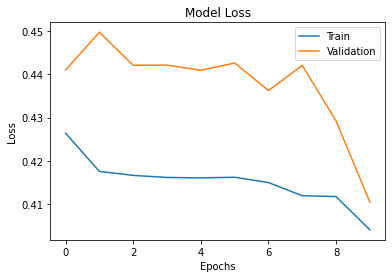

In [0]:
plot_loss(vol_model)

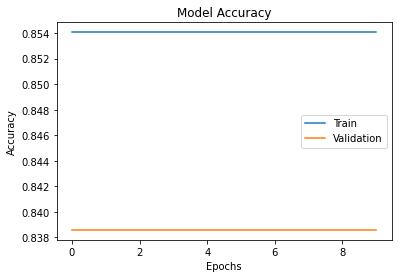

In [0]:
plot_accuracy(vol_model)

In [0]:
y_val_pred = model.predict(X_val)
y_val_pred[y_val_pred > 0.5] = 1
y_val_pred[y_val_pred <= 0.5] = 0

print("Train Accuracy: ", model.evaluate(X_train, y_train, verbose = 0)[1])
print("Test Accuracy: ", model.evaluate(X_val, y_val, verbose = 0)[1])

Train Accuracy:  0.8540645
Test Accuracy:  0.8385917


In [0]:
print_report(y_val, y_val_pred)

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1834
           1       0.00      0.00      0.00       353

    accuracy                           0.84      2187
   macro avg       0.42      0.50      0.46      2187
weighted avg       0.70      0.84      0.76      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1834    0]
 [ 353    0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### CNN

##### Iteration 1

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [0]:
X = X_train.reshape(-1, 110, 110, 1)
X_val = X_val.reshape(-1, 110, 110, 1)

In [0]:
model = tf.keras.Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

vol_model = model.fit(X, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size = 32, shuffle = True, verbose = 0)

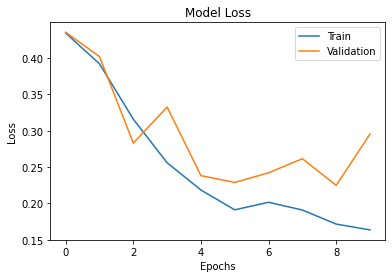

In [0]:
plot_loss(vol_model)

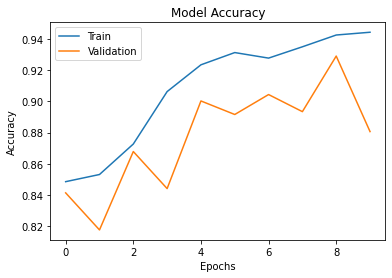

In [0]:
plot_accuracy(vol_model)

In [0]:
print("Train Accuracy: ", vol_model.history['acc'][-1])
print("Test Accuracy: ", vol_model.history['val_acc'][-1])

Train Accuracy:  0.94441974
Test Accuracy:  0.88065845


In [0]:
print_report(y_val, np.squeeze(model.predict(X_val) > 0.5))

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1840
           1       0.70      0.43      0.53       347

    accuracy                           0.88      2187
   macro avg       0.80      0.70      0.73      2187
weighted avg       0.87      0.88      0.87      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1778   62]
 [ 199  148]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


##### Iteration 2

In [0]:
model = tf.keras.Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

vol_model = model.fit(X, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size = 32, shuffle = True, verbose = 0)

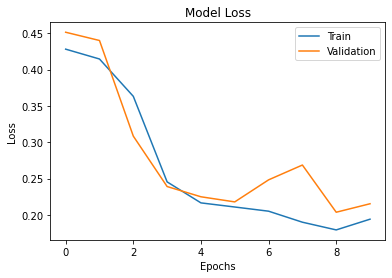

In [0]:
plot_loss(vol_model)

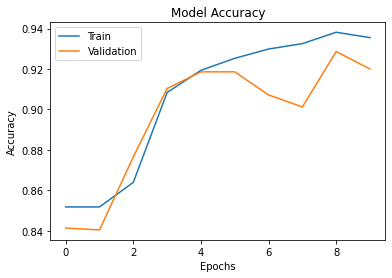

In [0]:
plot_accuracy(vol_model)

In [0]:
print("Train Accuracy: ", vol_model.history['acc'][-1])
print("Test Accuracy: ", vol_model.history['val_acc'][-1])

Train Accuracy:  0.9355269
Test Accuracy:  0.9199817


In [0]:
print_report(y_val, np.squeeze(model.predict(X_val) > 0.5))

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1840
           1       0.90      0.56      0.69       347

    accuracy                           0.92      2187
   macro avg       0.91      0.77      0.82      2187
weighted avg       0.92      0.92      0.91      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1819   21]
 [ 154  193]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


##### Iteration 3

In [0]:
model = tf.keras.Sequential()

model.add(Conv2D(256, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

vol_model = model.fit(X, y_train, validation_data=(X_val, y_val), epochs = 100, batch_size = 32, shuffle = True, verbose = 2)


print("Train Accuracy: ", vol_model.history['acc'][-1])
print("Test Accuracy: ", vol_model.history['val_acc'][-1])

Train Accuracy:  1.0
Test Accuracy:  0.957476


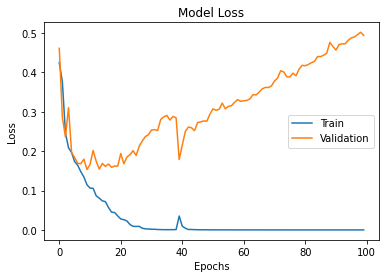

In [0]:
plot_loss(vol_model)

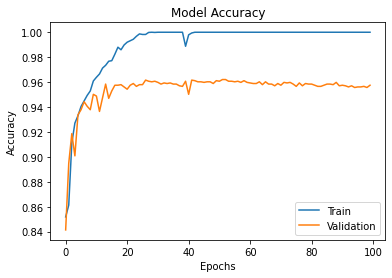

In [0]:
plot_accuracy(vol_model)

In [0]:
print_report(y_val, np.squeeze(model.predict(X_val) > 0.5))

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1840
           1       0.89      0.83      0.86       347

    accuracy                           0.96      2187
   macro avg       0.93      0.91      0.92      2187
weighted avg       0.96      0.96      0.96      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1805   35]
 [  58  289]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


##### Iteration 4

In [0]:
model = tf.keras.Sequential()

model.add(Conv2D(256, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

vol_model = model.fit(X, y_train, validation_data=(X_val, y_val), epochs = 20, batch_size = 32, shuffle = True, verbose = 0)

print("Train Accuracy: ", vol_model.history['acc'][-1])
print("Test Accuracy: ", vol_model.history['val_acc'][-1])

Train Accuracy:  0.9872536
Test Accuracy:  0.97073615


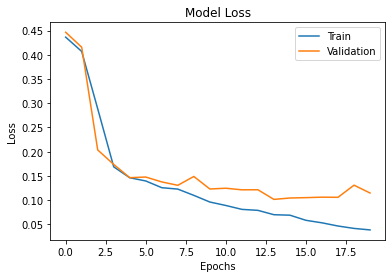

In [0]:
plot_loss(vol_model)

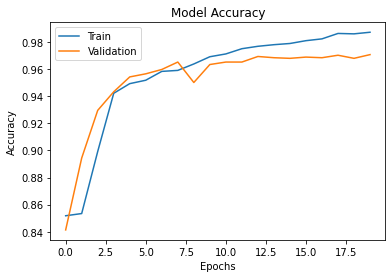

In [0]:
plot_accuracy(vol_model)

In [0]:
print_report(y_val, np.squeeze(model.predict(X_val) > 0.5))

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1840
           1       0.94      0.87      0.90       347

    accuracy                           0.97      2187
   macro avg       0.96      0.93      0.94      2187
weighted avg       0.97      0.97      0.97      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1820   20]
 [  44  303]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


##### Iteration 5

In [0]:
model = tf.keras.Sequential()

model.add(Conv2D(256, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

vol_model = model.fit(X, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size = 10, shuffle = True, verbose = 1)

print("Train Accuracy: ", vol_model.history['acc'][-1])
print("Test Accuracy: ", vol_model.history['val_acc'][-1])

Train on 6747 samples, validate on 2187 samples
Epoch 1/10
6747/6747 [==============================] - 28s 4ms/sample - loss: 0.4226 - acc: 0.8549 - val_loss: 0.2870 - val_acc: 0.8989
Epoch 2/10
6747/6747 [==============================] - 25s 4ms/sample - loss: 0.1975 - acc: 0.9358 - val_loss: 0.1769 - val_acc: 0.9456
Epoch 3/10
6747/6747 [==============================] - 25s 4ms/sample - loss: 0.1627 - acc: 0.9480 - val_loss: 0.1591 - val_acc: 0.9520
Epoch 4/10
6747/6747 [==============================] - 25s 4ms/sample - loss: 0.1410 - acc: 0.9552 - val_loss: 0.1626 - val_acc: 0.9428
Epoch 5/10
6747/6747 [==============================] - 25s 4ms/sample - loss: 0.1257 - acc: 0.9598 - val_loss: 0.1445 - val_acc: 0.9611
Epoch 6/10
6747/6747 [==============================] - 26s 4ms/sample - loss: 0.1185 - acc: 0.9618 - val_loss: 0.1367 - val_acc: 0.9598
Epoch 7/10
6747/6747 [==============================] - 25s 4ms/sample - loss: 0.1028 - acc: 0.9672 - val_loss: 0.1048 - val_acc: 

In [0]:
print_report(y_val, np.squeeze(model.predict(X_val) > 0.5))

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1840
           1       0.99      0.82      0.90       347

    accuracy                           0.97      2187
   macro avg       0.98      0.91      0.94      2187
weighted avg       0.97      0.97      0.97      2187

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Confusion Matrix:
[[1836    4]
 [  61  286]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [0]:
y_val_pred = np.squeeze(model.predict(X_val) > 0.5)

In [0]:
missed_idx = []
for i in range(len(y_val)):
    if y_val[i] != y_val_pred[i]:
        missed_idx.append(i)

In [0]:
len(missed_idx)

65

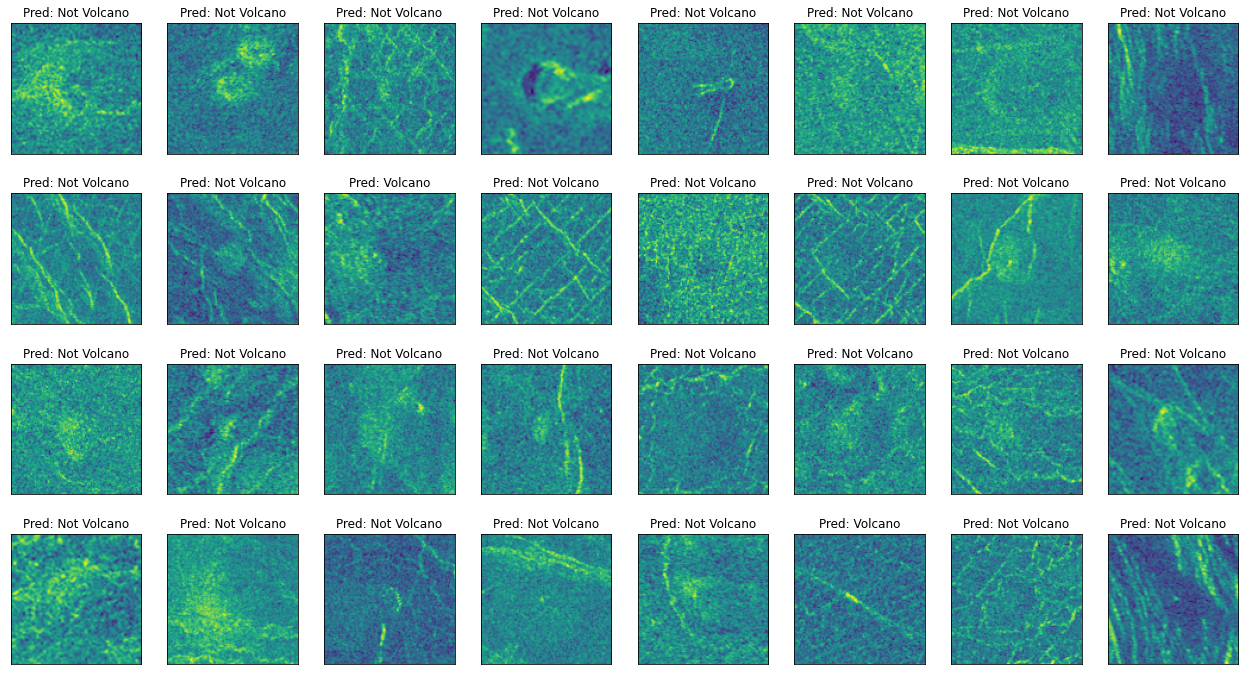

In [0]:
plt.figure(figsize = (22, 12))

for i in range(0, 32):
    subplot(4, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_val[missed_idx[i]].reshape(110, 110))
    plt.title("Pred: Volcano" if y_val_pred[missed_idx[i]] == 1 else "Pred: Not Volcano")